# Exploratory analysis of Mexican families finances
Source: [INEGI](https://www.inegi.org.mx/programas/enigh/nc/2018/default.html#Microdatos)

# Expense

In [3]:
import pandas as pd

expense = pd.read_csv('data/raw/gastoshogar.csv')
%store expense
expense

Stored 'expense' (DataFrame)


,folioviv,foliohog,clave,tipo_gasto,mes_dia,forma_pag1,forma_pag2,forma_pag3,lugar_comp,orga_inst,...,inmujer,inst_1,inst_2,num_meses,num_pagos,ultim_pago,gasto_tri,gasto_nm,gas_nm_tri,imujer_tri
0,100013601,1,C002,G1,0,1,0,0,6,0,...,,,,,,,90,,,
1,100013601,1,C004,G1,0,1,0,0,10,0,...,,,,,,,252,,,
2,100013601,1,C005,G1,0,1,0,0,10,0,...,,,,,,,180,,,
3,100013601,1,D001,G1,0,1,0,0,6,0,...,-1,,,,,,99,,,-1
4,100013601,1,F007,G1,0,1,0,0,0,0,...,,,,,,,7200,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405245,3260798902,1,G104,G7,0,0,0,0,0,0,...,,,,,,,,1000,2903.22,
4405246,3260798903,1,G104,G7,0,0,0,0,0,0,...,,,,,,,,1000,2903.22,
4405247,3260798904,1,G104,G7,0,0,0,0,0,0,...,,,,,,,,700,2032.25,
4405248,3260798905,1,G101,G1,0,0,0,0,0,0,...,,,,,,,2903.22,,,


In [4]:
%store -r
expense.columns

Index(['folioviv', 'foliohog', 'clave', 'tipo_gasto', 'mes_dia', 'forma_pag1',
       'forma_pag2', 'forma_pag3', 'lugar_comp', 'orga_inst', 'frecuencia',
       'fecha_adqu', 'fecha_pago', 'cantidad', 'gasto', 'pago_mp', 'costo',
       'inmujer', 'inst_1', 'inst_2', 'num_meses', 'num_pagos', 'ultim_pago',
       'gasto_tri', 'gasto_nm', 'gas_nm_tri', 'imujer_tri'],
      dtype='object')

# Income

In [25]:
income = pd.read_csv('data/raw/ingresos.csv')
family_income = income.groupby(by='folioviv').sum()
family_income = family_income.loc[:,'ing_tri']
%store income family_income
family_income

Stored 'income' (DataFrame)


folioviv
100013601      63885.23
100013602      16442.41
100013603     171393.40
100013604      30245.88
100013606      43229.49
                ...    
3260798902     23869.56
3260798903      8686.94
3260798904     69921.17
3260798905     21619.56
3260798906      9273.90
Name: ing_tri, Length: 73355, dtype: float64

## NSE distribution

In [37]:
nse = pd.DataFrame(data={'proportion': [0.11, 0.3, 0.15, 0.14, 0.13, 0.11, 0.06],
                         'l_lo': [0.0, 0.12, 0.42, 0.57, 0.71, 0.84, 0.95],
                         'l_hi': [0.11, 0.41, 0.56, 0.70, 0.83, 0.94, 1]},
                  index= ['e', 'd', 'd+', 'c-', 'c', 'c+', 'ab'])
nse

,proportion,l_lo,l_hi
e,0.11,0.00,0.11
d,0.30,0.12,0.41
d+,0.15,0.42,0.56
c-,0.14,0.57,0.70
c,0.13,0.71,0.83
c+,0.11,0.84,0.94
ab,0.06,0.95,1.00


## Income distribution by level

### Normality tests

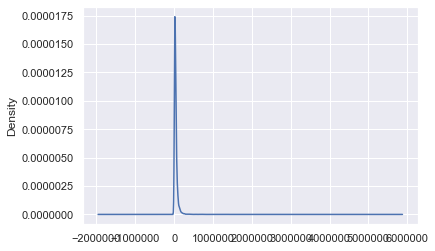

In [20]:
import pandas as pd
import numpy as np
from scipy import stats

sample = family_income.sample(n=10000)
sample.plot.kde()

In [21]:
stats.normaltest(sample)

NormaltestResult(statistic=24380.083677830415, pvalue=0.0)

### Classify family income

In [70]:
# e class
dcf_breaks = [0.0, 0.11, 0.41, 0.56, 0.70, 0.83, 0.94, 1]
nse_breaks = []
family_nse = pd.DataFrame({'income': family_income})
#family_nse['level'] = 'na'

# e class
#nse_level = nse.loc['e']
#e_lo = family_nse.quantile(nse_level['l_lo']).income
#l_hi = family_nse.quantile(nse_level['l_hi']).income
#selection = family_nse[family_nse['income'].between(left=l_lo, right=l_hi)]
#categories = pd.cut(family_nse.stack(),)

for limit in dcf_breaks:
    nse_break = family_nse.quantile(limit).income
    nse_breaks.append(nse_break)

categories = pd.cut(family_nse.stack(),
                    nse_breaks,
                    labels=['e', 'd', 'd+', 'c-', 'c', 'c+', 'ab'])

family_nse = family_nse.join(categories.unstack().add_suffix('_cat'))
family_nse

,income,income_cat
folioviv,,
100013601,63885.23,c+
100013602,16442.41,d
100013603,171393.40,ab
100013604,30245.88,d+
100013606,43229.49,c-
...,...,...
3260798902,23869.56,d+
3260798903,8686.94,e
3260798904,69921.17,c+


# Health expense by income

In [13]:
health_codes = pd.read_csv('data/documentation/health_codes.csv', sep='|')
health_codes

,code,description
0,J001,Servicios medicos durante el embarazo - Honora...
1,J002,Servicios medicos durante el embarazo - Hospit...
2,J003,Servicios medicos durante el embarazo - Anális...
3,J004,Servicios medicos durante el embarazo - Medica...
4,J005,Servicios medicos durante el embarazo - Servic...
...,...,...
66,J068,Aparatos ortopedicos y terapeuticos - Reparaci...
67,J069,Seguro medico - Otros: pago de enfermeras y pe...
68,J070,Seguro medico - Cuotas a hospitales o clínicas
69,J071,Seguro medico - Cuotas a compañías de seguros


In [68]:
import numpy as np

health_expense = expense[expense['clave'].isin(health_codes['code'])]
health_expense = health_expense.loc[:,['folioviv', 'clave','gasto_tri', 'gas_nm_tri']]
health_expense['gasto_tri'] = pd.to_numeric(health_expense['gasto_tri'], errors="coerce")
health_expense['gas_nm_tri'] = pd.to_numeric(health_expense['gas_nm_tri'], errors="coerce")
health_expense = health_expense.replace(np.nan, 0)

health_expense['gasto_total'] = health_expense['gasto_tri'] + health_expense['gas_nm_tri']

health_expense = health_expense.groupby(by=['folioviv'], as_index=False).sum()

for index, row in health_expense.iterrows():
    folioviv = row['folioviv']
    try:
        viv_income = family_income.loc[folioviv]
    except:
        viv_income = np.nan
        
    health_expense.loc[index, 'income'] = viv_income
    
%store health_expense
health_expense

Stored 'health_expense' (DataFrame)


,folioviv,gasto_tri,gas_nm_tri,gasto_total,income
0,100013601,0.00,518.47,518.47,63885.23
1,100013602,1348.99,1076.08,2425.07,16442.41
2,100013603,28858.68,391304.34,420163.02,171393.40
3,100013604,322.82,4744.53,5067.35,30245.88
4,100013606,56.73,107.60,164.33,43229.49
...,...,...,...,...,...
44341,3260798808,0.00,1320.65,1320.65,11936.06
44342,3260798809,11.73,0.00,11.73,19180.32
44343,3260798811,8804.34,381.51,9185.85,7529.49
44344,3260798812,0.00,8217.36,8217.36,13278.67
